In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

# Convert labels to integers
y = y.astype(np.int8)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

# Split the data into training and testing sets1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.08%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[1294    1    7    0    3   13   13    4    6    2]
 [   0 1550    6   10    3   12    0    4   13    2]
 [   5   20 1234   21   15    9   20   17   29   10]
 [   6    9   30 1282    1   39    7   18   23   18]
 [   6    3    6    4 1201    5   11    8    7   44]
 [   4   10    7   41   12 1125   20    4   36   14]
 [   5    4   19    1   14   17 1331    2    3    0]
 [   6    4   26    3   11    6    0 1415    1   31]
 [  10   26   13   44    6   42    9    9 1178   20]
 [   7   11    6   13   36    7    0   44   15 1281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      

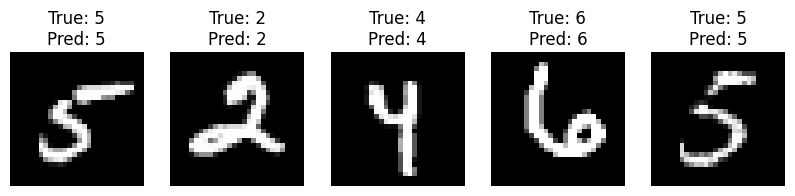

In [ ]:
# Function to plot some of the test images with predicted labels
def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {predictions[i]}")
        plt.axis('off')
    plt.show()

# Ensure X_test, y_test, and y_pred are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Select some random indices for visualization
indices = np.random.choice(len(X_test), size=5, replace=False)

# Use the function to plot the selected images
plot_images(X_test[indices], y_test[indices], y_pred[indices])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.3413 - loss: 1.7804 - val_accuracy: 0.5381 - val_loss: 1.2753
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5564 - loss: 1.2420 - val_accuracy: 0.6059 - val_loss: 1.1030
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6188 - loss: 1.0738 - val_accuracy: 0.6324 - val_loss: 1.0376
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6629 - loss: 0.9638 - val_accuracy: 0.6595 - val_loss: 0.9570
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6853 - loss: 0.8955 - val_accuracy: 0.6750 - val_loss: 0.9240
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7043 - loss: 0.8373 - val_accuracy: 0.6377 - val_loss: 1.0324
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7216 - loss: 0.7816 - val_accuracy: 0.6866 - val_loss: 0.9113
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7446 -

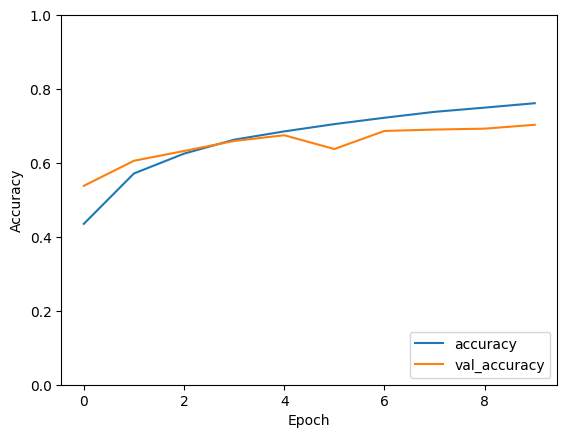

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
[1.18879696e-04 7.92730061e-05 6.44892047e-04 7.18772113e-01
 3.69255943e-03 2.71452591e-02 4.35872283e-03 2.94041849e-04
 2.44883105e-01 1.11305044e-05]
[3]


In [2]:
#Step 1: Import Necessary Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#Step 2: Load and Preprocess the CIFAR-10 Dataset
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0
#Step 3: Define the CNN Architecture
cnn = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output from the convolutional layers
    layers.Flatten(),

    # Fully Connected Layer
    layers.Dense(64, activation='relu'),

    # Output Layer (10 classes for CIFAR-10)
    layers.Dense(10, activation='softmax')
])

# Display the model's architecture
cnn.summary()
#Step 4: Compile the Model
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
#Step 5: Train the CNN Model
# Train the model
history = cnn.fit(X_train, y_train, epochs=10,
                  validation_data=(X_test, y_test))
#Step 6: Evaluate the Model
# Evaluate the model on the test set
test_loss, test_acc = cnn.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
#Step 7: Visualize the Training Process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
#Step 8: Make Predictions (Optional)
predictions = cnn.predict(X_test)
print(predictions[0])  # Predicted probabilities for the first image
print(y_test[0])       # Actual label of the first image

In [16]:
pip install torch torchvision matplotlib


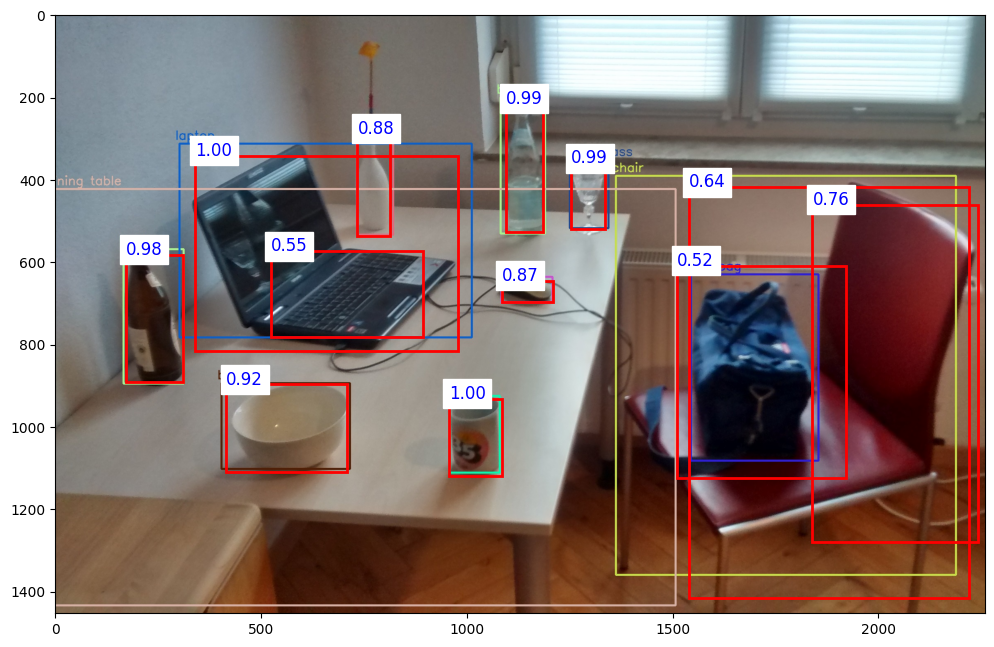

In [17]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load Faster R-CNN pre-trained on COCO dataset
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Device configuration: use GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Function to load an image and apply transformations
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform_image = F.to_tensor(image)
    return transform_image.unsqueeze(0), image  # add batch dimension

# Function to perform object detection and return predictions
def detect_objects(image_tensor):
    with torch.no_grad():
        prediction = model(image_tensor.to(device))
    return prediction

# Function to visualize predictions on the image
def visualize(image, predictions, threshold=0.5):
    # Plot the image
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(image)

    # Get the predicted bounding boxes and labels
    boxes = predictions[0]['boxes'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()

    # Iterate through each prediction and draw bounding boxes for confident predictions
    for idx, box in enumerate(boxes):
        if scores[idx] > threshold:
            # Create a Rectangle patch for the bounding box
            xmin, ymin, xmax, ymax = box
            rect = patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            # Add the score of the detection
            ax.text(xmin, ymin, f'{scores[idx]:.2f}', color='blue', fontsize=12, backgroundcolor='white')

    plt.show()

# Main function to run detection on an input image
def main(image_path):
    # Load the image
    image_tensor, image = load_image(image_path)

    # Perform object detection
    predictions = detect_objects(image_tensor)

    # Visualize the results
    visualize(image, predictions)

# Run detection on an example image (input your own image path)
image_path = '/content/Detected-with-YOLO--Schreibtisch-mit-Objekten.jpg'
main(image_path)
